<a href="https://colab.research.google.com/github/user1855/DMC_courses/blob/main/PEA/Unsupervised%20Methods/s3_DBSCAN_mall_customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Supervisado

In [ ]:
# Importar las librerías
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import matplotlib

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Lista de colores
colors=['purple','red','blue','green','yellow','pink']

# Cargamos los datos con pandas
dataset = pd.read_csv("Mall_Customers.csv")
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
colors=['purple','red','blue','green','yellow','pink']

In [ ]:
X = dataset.iloc[:, [3,4]]

In [ ]:
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [ ]:
scaler = StandardScaler()
X_esc = scaler.fit_transform(X)
X_esc = pd.DataFrame(X_esc,columns=list(X.columns))
X_esc.head(10)

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
5,-1.662660,1.001596
6,-1.624491,-1.715913
7,-1.624491,1.700384
8,-1.586321,-1.832378
9,-1.586321,0.846310


In [ ]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X_esc[['Annual Income (k$)','Spending Score (1-100)']])
distances, indices = nbrs.kneighbors(X_esc[['Annual Income (k$)','Spending Score (1-100)']])
distances

array([[0.        , 0.08564307],
       [0.        , 0.15990848],
       [0.        , 0.07633886],
       [0.        , 0.0544428 ],
       [0.        , 0.08564307],
       [0.        , 0.0544428 ],
       [0.        , 0.07633886],
       [0.        , 0.19782504],
       [0.        , 0.12255989],
       [0.        , 0.17303595],
       [0.        , 0.0544428 ],
       [0.        , 0.15753602],
       [0.        , 0.0544428 ],
       [0.        , 0.07764312],
       [0.        , 0.0544428 ],
       [0.        , 0.07764312],
       [0.        , 0.11450829],
       [0.        , 0.24511979],
       [0.        , 0.22357696],
       [0.        , 0.15753602],
       [0.        , 0.11450829],
       [0.        , 0.03816943],
       [0.        , 0.19475561],
       [0.        , 0.03816943],
       [0.        , 0.19084715],
       [0.        , 0.19475561],
       [0.        , 0.0544428 ],
       [0.        , 0.33025172],
       [0.        , 0.0544428 ],
       [0.        , 0.19782504],
       [0.

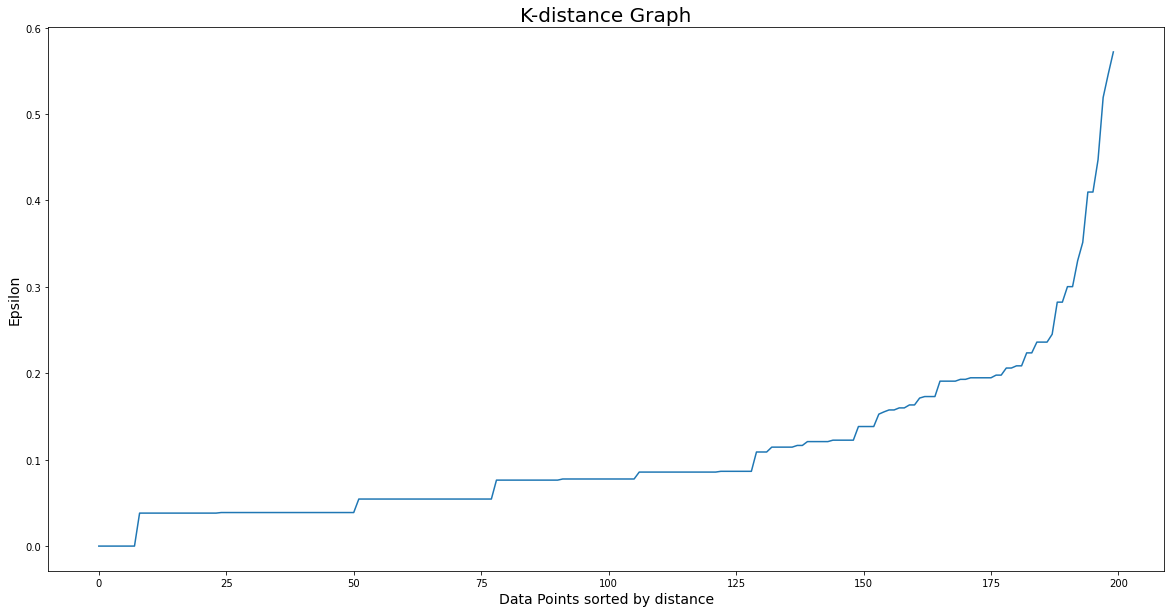

In [ ]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

 0    111
 2     32
 3     26
-1     19
 1     12
Name: DBSCAN_opt_labels, dtype: int64


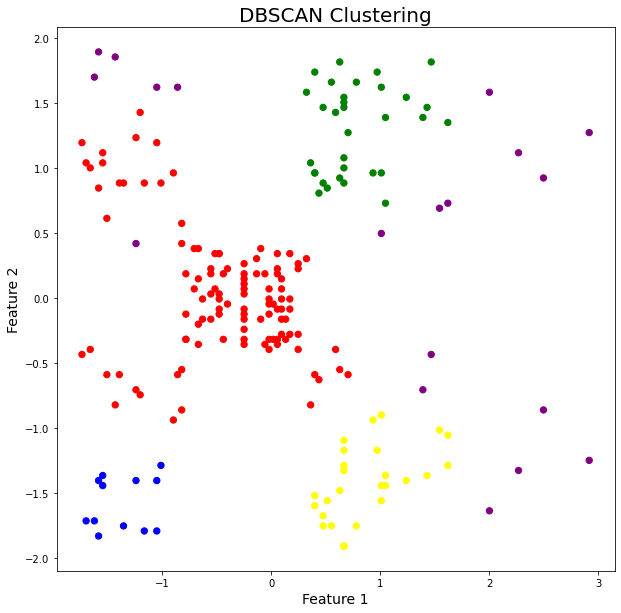

In [ ]:
from sklearn.cluster import DBSCAN
dbscan_opt=DBSCAN(eps=0.39,min_samples=6)
dbscan_opt.fit(X_esc[['Annual Income (k$)','Spending Score (1-100)']])

X_esc['DBSCAN_opt_labels']=dbscan_opt.labels_
print(X_esc['DBSCAN_opt_labels'].value_counts())

plt.figure(figsize=(10,10))
plt.scatter(X_esc['Annual Income (k$)'],X_esc['Spending Score (1-100)'],c=X_esc['DBSCAN_opt_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=40)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

 2    96
 3    31
 4    23
-1    23
 0    15
 1    12
Name: DBSCAN_opt_labels, dtype: int64


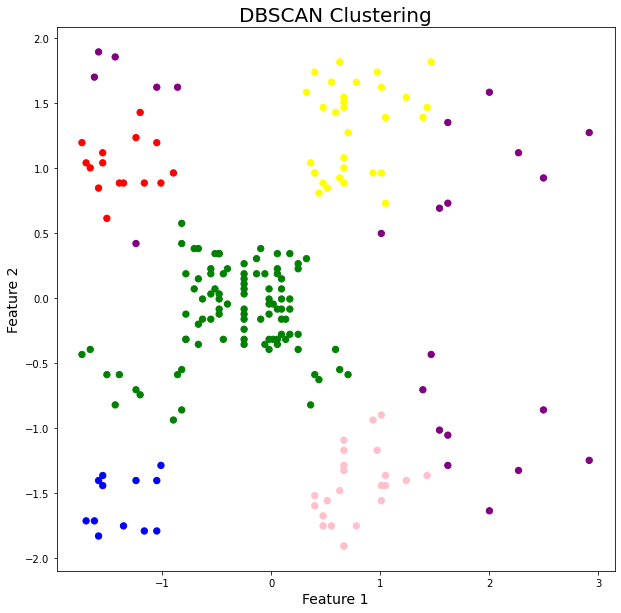

In [ ]:
from sklearn.cluster import DBSCAN
dbscan_opt=DBSCAN(eps=0.38,min_samples=7)
dbscan_opt.fit(X_esc[['Annual Income (k$)','Spending Score (1-100)']])

X_esc['DBSCAN_opt_labels']=dbscan_opt.labels_
print(X_esc['DBSCAN_opt_labels'].value_counts())

plt.figure(figsize=(10,10))
plt.scatter(X_esc['Annual Income (k$)'],X_esc['Spending Score (1-100)'],c=X_esc['DBSCAN_opt_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=40)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()